<h1>
    Churn butter not customers
</h1>

In [1]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

# Custom module imports
import acquire
import prepare
# import explore
# from model import score_models


<hr>

<h2>
    Planning
</h2>

- Create README.md with data dictionary, project and business goals, come up with initial hypotheses.
(half-started, not finished)
- Acquire data from the Codeup Database and create a function to automate this process. Save the function in an acquire.py file to import into the Final Report Notebook.
(DONE)
- Clean and prepare data for the first iteration through the pipeline, MVP preparation. Create a function to automate the process, store the function in a prepare.py module, and prepare data in Final Report Notebook by importing and using the funtion.
(DONE, mostly may need more target variables to work through)
- Clearly define two hypotheses, set an alpha, run the statistical tests needed, reject or fail to reject the Null Hypothesis, and document findings and takeaways.
(my two hypotheses will be when I find the heaviest weights in variables)
- Establish a baseline accuracy and document well.
- Train three different classification models.
- Evaluate models on train and validate datasets.
- Choose the model with that performs the best and evaluate that single model on the test dataset.
- Create csv file with the measurement id, the probability of the target values, and the model's prediction for each observation in my test dataset.
    Document conclusions, takeaways, and next steps in the Final Report Notebook.



<h2>
    Acquire
</h2>

In [2]:
telco = acquire.telco()
telco.head(5)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [3]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

<h2>
Prepare
</h2>

Split model into test train and split

In [4]:
train, validate, test = prepare.prep_telco_data(telco)
train, validate, test

(      gender  senior_citizen partner dependents  tenure phone_service  \
 5919  Female               0      No         No      58           Yes   
 1915    Male               0      No        Yes      71           Yes   
 5054  Female               0     Yes        Yes      35           Yes   
 2355    Male               0     Yes        Yes       1           Yes   
 6279    Male               1      No         No      20           Yes   
 ...      ...             ...     ...        ...     ...           ...   
 394   Female               0      No         No      24           Yes   
 3763  Female               0     Yes        Yes      10           Yes   
 3444  Female               0     Yes        Yes      22           Yes   
 1002    Male               0      No        Yes      22           Yes   
 4192    Male               0      No         No       2           Yes   
 
      multiple_lines      online_security        online_backup  \
 5919            Yes                  Yes   

In [5]:
train.shape, validate.shape, test.shape

((3937, 47), (1688, 47), (1407, 47))

<h2>
    Explore
</h2>

Text(0.5, 0, 'Churned')

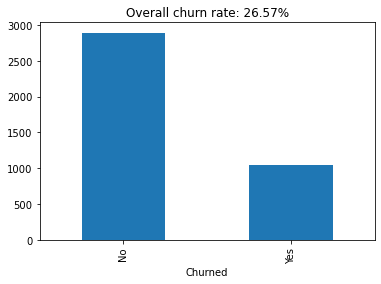

In [6]:
train.churn.value_counts().sort_index().plot.bar()
churn_rate = train.churn_encoded.mean()
plt.title(f"Overall churn rate: {churn_rate:.2%}")
plt.xlabel('Churned')

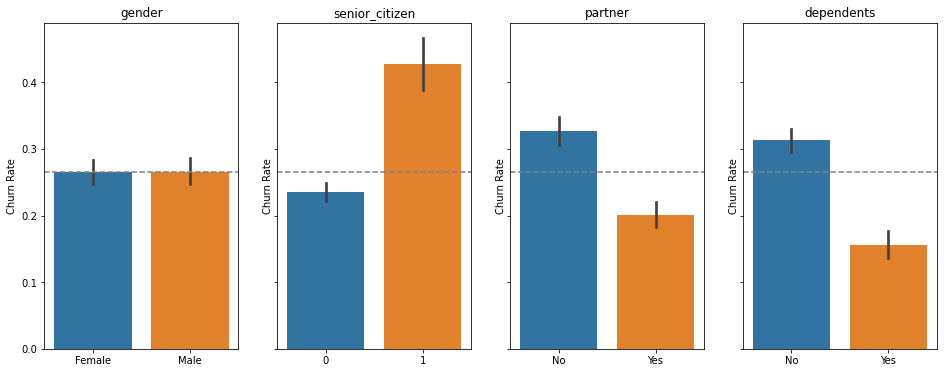

In [7]:
features = ['gender',
            'senior_citizen',
            'partner',
            'dependents',]

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

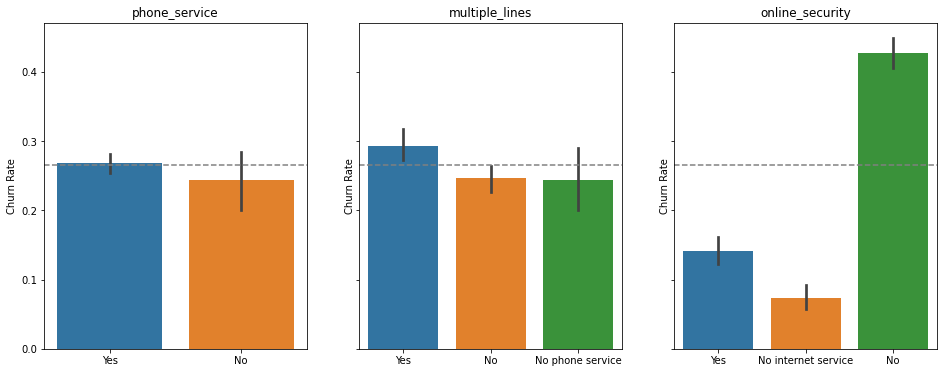

In [8]:
features = ['phone_service',
            'multiple_lines',
            'online_security']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

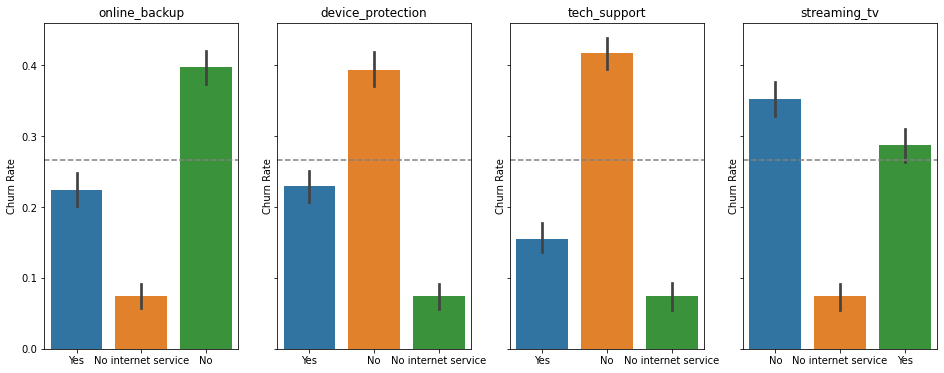

In [9]:
features = ['online_backup',
            'device_protection',
            'tech_support',
            'streaming_tv']

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

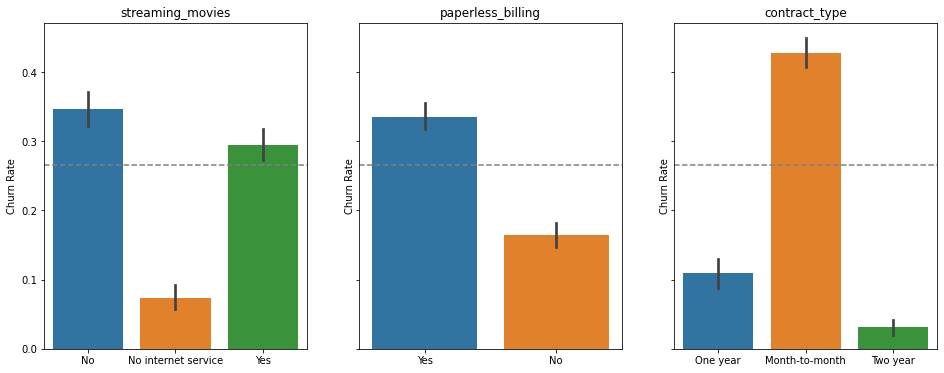

In [10]:
features = ['streaming_movies',
            'paperless_billing',
            'contract_type']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

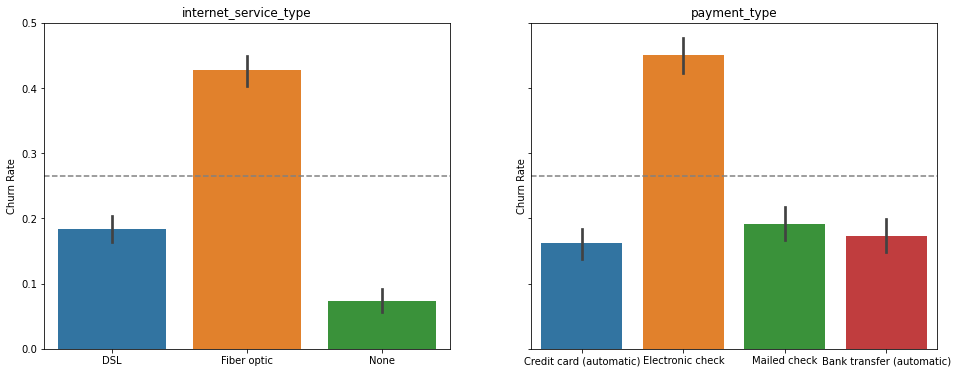

In [11]:
features = ['internet_service_type','payment_type']

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

Text(0, 0.5, 'Churn Rate')

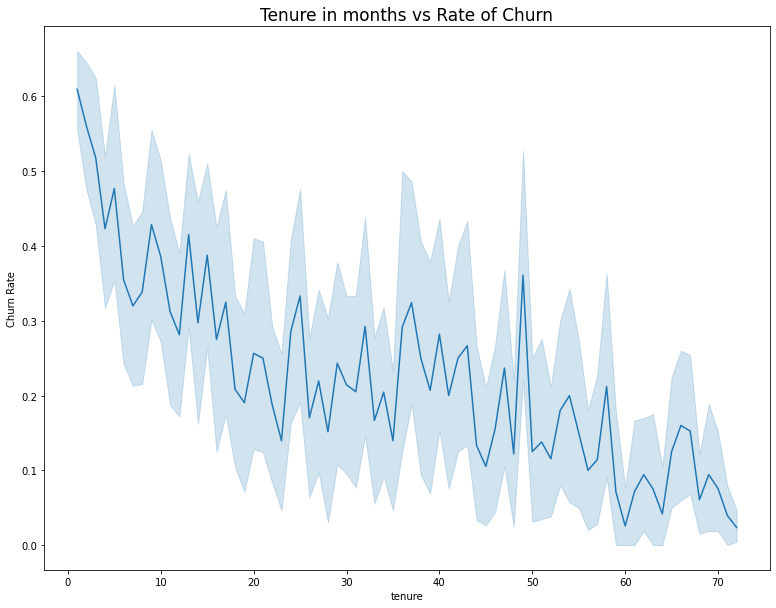

In [12]:
plt.figure('figure', figsize=(13, 10))
plt.title("Tenure in months vs Rate of Churn", fontsize=17)
ax = sns.lineplot(x="tenure", y="churn_encoded", data=train)
plt.ylabel('Churn Rate')

This about wraps up easily where I can get the most bang for my buck when it comes to the variables

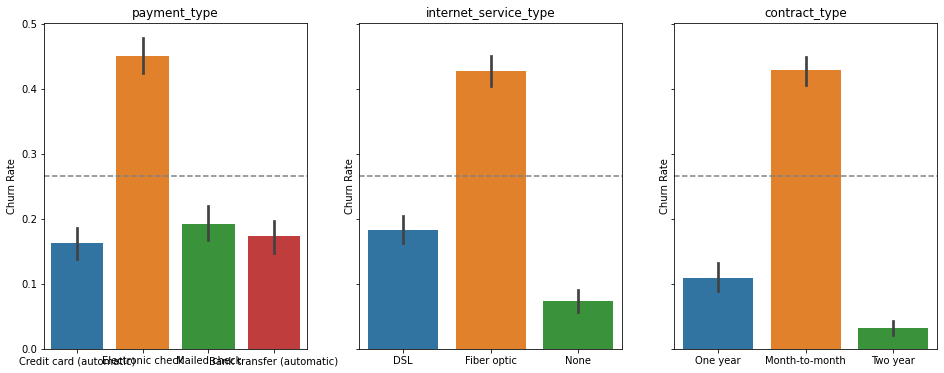

In [13]:
features = ['payment_type','internet_service_type','contract_type']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')
#this set of variables will be what I work through
#this is where i put my statistical stuff done

In [14]:
# subgroup
churned_electric_check_and_fiber = train.churn[(train.payment_type == 'Electronic check') & (train.internet_service_type == 'Fiber optic')]
#from here i cross tab because churn already a binary value
churned_electric_check_and_fiber.value_counts()

Yes    468
No     394
Name: churn, dtype: int64

In [15]:
electronic_check = train.churn[train.payment_type == 'Electronic check']
pd.crosstab(electronic_check, train.churn)

churn,No,Yes
churn,,
No,708,0
Yes,0,581


In [16]:
ctab = pd.crosstab(electronic_check, train.churn)
ctab

churn,No,Yes
churn,,
No,708,0
Yes,0,581


In [17]:
electronic_check

5054     No
6992    Yes
4352     No
6845    Yes
3171    Yes
       ... 
2208     No
2579    Yes
2194    Yes
659     Yes
3763    Yes
Name: churn, Length: 1289, dtype: object

### take aways:
My targets are fiber internet, electronic checks, and month to month payers

<h2>
    Statistical Testing
</h2>

In [18]:
alpha = 0.05

## Modeling

in my models I am going to need to have so sort of accuracy for what my baseline will be

In [26]:
baseline_accuracy = (evaluations.baseline == evaluations.actual).mean()

print(f'Baseline Accuracy: {baseline_accuracy:.2%}')

Baseline Accuracy: 73.40%


In [19]:
def feature_target_selector(features, target, train=train, validate=validate, test=test):
    X_train = train[features]
    y_train = train[target]
    X_validate = validate[features]
    y_validate = validate[target]
    X_test = test[features]
    y_test = test[target]
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [20]:
train.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'contract_type', 'internet_service_type', 'payment_type',
       'gender_encoded', 'partner_encoded', 'dependents_encoded',
       'phone_service_encoded', 'paperless_billing_encoded', 'churn_encoded',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'contract_type_

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 3937 non-null   object 
 1   senior_citizen                         3937 non-null   int64  
 2   partner                                3937 non-null   object 
 3   dependents                             3937 non-null   object 
 4   tenure                                 3937 non-null   int64  
 5   phone_service                          3937 non-null   object 
 6   multiple_lines                         3937 non-null   object 
 7   online_security                        3937 non-null   object 
 8   online_backup                          3937 non-null   object 
 9   device_protection                      3937 non-null   object 
 10  tech_support                           3937 non-null   object 
 11  s

# features = ['payment_type','internet_service_type','contract_type']
# target = ['churn_encoded']
# X_train, y_train, X_validate, y_validate, X_test, y_test = feature_target_selector(features, target)

# evaluations = pd.DataFrame({"actual": y_validate.churn_encoded})
# evaluations["baseline"] = 0
# matrix = pd.crosstab(evaluations.actual, evaluations.baseline)
# matrix

# logit = LogisticRegression(random_state=123, solver='lbfgs')
# logit.fit(X_train, y_train)
# print('Coefficient: \n', logit.coef_)
# print('Intercept: \n', logit.intercept_)